## Importa√ß√µes

In [31]:
import pandas as pd
from math import floor
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.naive_bayes import GaussianNB
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import norm
from sklearn.metrics import accuracy_score,classification_report, f1_score, confusion_matrix,recall_score,precision_score

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import chi2,f_classif, f_oneway,f_regression,r_regression, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler

## Fun√ß√µes Comuns

In [32]:
def funcPlotMatriz(y_test, classificar):
    matriz_de_confusao = confusion_matrix(y_test, classificar)
    sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
    plt.show()


def funcMetricas(df_metricas,modelo_Versao, df,quant_columns,Hyper_Parametros,y_test, classificar):
    metricas = [
        modelo_Versao,
        df,
        quant_columns,
        Hyper_Parametros,
        accuracy_score(y_test, classificar), 
        round(recall_score(y_test, classificar, pos_label=0,average='macro'),2),
        round(precision_score(y_test, classificar, pos_label=0,average='macro'),2),
        round(f1_score(y_test, classificar, pos_label=0,average='macro'),2)
        ]
    
    nova_linha_df = pd.DataFrame([metricas], columns=df_metricas.columns)

    df_metricas = pd.concat([df_metricas, nova_linha_df], ignore_index=True)
    
    return df_metricas


## Extraindo a Base

In [33]:
df_original = pd.read_excel('..\dados\df_original.xlsx')

df = df_original.copy()

display(df)

Gender  Age    Height      Weight family_history_with_overweight FAVC  \
0     Female   21  1.620000   64.000000                            yes   no   
1     Female   21  1.520000   56.000000                            yes   no   
2       Male   23  1.800000   77.000000                            yes   no   
3       Male   27  1.800000   87.000000                             no   no   
4       Male   22  1.780000   89.800000                             no   no   
...      ...  ...       ...         ...                            ...  ...   
2106  Female   20  1.710730  131.408528                            yes  yes   
2107  Female   21  1.748584  133.742943                            yes  yes   
2108  Female   22  1.752206  133.689352                            yes  yes   
2109  Female   24  1.739450  133.346641                            yes  yes   
2110  Female   23  1.738836  133.472641                            yes  yes   

      FCVC  NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0        2    3  Sometimes    no     2   no    0    1          no   
1        3    3  Sometimes   yes     3  yes    3    0   Sometimes   
2        2    3  Sometimes    no     2   no    2    1  Frequently   
3        3    3  Sometimes    no     2   no    2    0  Frequently   
4        2    1  Sometimes    no     2   no    0    0   Sometimes   
...    ...  ...        ...   ...   ...  ...  ...  ...         ...   
2106     3    3  Sometimes    no     2   no    2    1   Sometimes   
2107     3    3  Sometimes    no     2   no    1    1   Sometimes   
2108     3    3  Sometimes    no     2   no    1    1   Sometimes   
2109     3    3  Sometimes    no     3   no    1    1   Sometimes   
2110     3    3  Sometimes    no     3   no    1    1   Sometimes   

                     MTRANS           NObeyesdad  
0     Public_Transportation        Normal_Weight  
1     Public_Transportation        Normal_Weight  
2     Public_Transportation        Normal_Weight  
3                   Walking   Overweight_Level_I  
4     Public_Transportation  Overweight_Level_II  
...                     ...                  ...  
2106  Public_Transportation     Obesity_Type_III  
2107  Public_Transportation     Obesity_Type_III  
2108  Public_Transportation     Obesity_Type_III  
2109  Public_Transportation     Obesity_Type_III  
2110  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

### Dividindo o Dataframe em Valor Explicativo e Resposta

In [34]:
df_x ,df_y= df.iloc[:, :-1],df.iloc[:, -1]

df_y = pd.DataFrame(df_y)
display(df_x)
display(df_y)

Gender  Age    Height      Weight family_history_with_overweight FAVC  \
0     Female   21  1.620000   64.000000                            yes   no   
1     Female   21  1.520000   56.000000                            yes   no   
2       Male   23  1.800000   77.000000                            yes   no   
3       Male   27  1.800000   87.000000                             no   no   
4       Male   22  1.780000   89.800000                             no   no   
...      ...  ...       ...         ...                            ...  ...   
2106  Female   20  1.710730  131.408528                            yes  yes   
2107  Female   21  1.748584  133.742943                            yes  yes   
2108  Female   22  1.752206  133.689352                            yes  yes   
2109  Female   24  1.739450  133.346641                            yes  yes   
2110  Female   23  1.738836  133.472641                            yes  yes   

      FCVC  NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0        2    3  Sometimes    no     2   no    0    1          no   
1        3    3  Sometimes   yes     3  yes    3    0   Sometimes   
2        2    3  Sometimes    no     2   no    2    1  Frequently   
3        3    3  Sometimes    no     2   no    2    0  Frequently   
4        2    1  Sometimes    no     2   no    0    0   Sometimes   
...    ...  ...        ...   ...   ...  ...  ...  ...         ...   
2106     3    3  Sometimes    no     2   no    2    1   Sometimes   
2107     3    3  Sometimes    no     2   no    1    1   Sometimes   
2108     3    3  Sometimes    no     2   no    1    1   Sometimes   
2109     3    3  Sometimes    no     3   no    1    1   Sometimes   
2110     3    3  Sometimes    no     3   no    1    1   Sometimes   

                     MTRANS  
0     Public_Transportation  
1     Public_Transportation  
2     Public_Transportation  
3                   Walking  
4     Public_Transportation  
...                     ...  
2106  Public_Transportation  
2107  Public_Transportation  
2108  Public_Transportation  
2109  Public_Transportation  
2110  Public_Transportation  

[2111 rows x 16 columns]

NObeyesdad
0           Normal_Weight
1           Normal_Weight
2           Normal_Weight
3      Overweight_Level_I
4     Overweight_Level_II
...                   ...
2106     Obesity_Type_III
2107     Obesity_Type_III
2108     Obesity_Type_III
2109     Obesity_Type_III
2110     Obesity_Type_III

[2111 rows x 1 columns]

### Transformando os Dados Qualitativos em Quantitativos

In [35]:
label_encolder = LabelEncoder()

preprocessador = ColumnTransformer(
    transformers=[
        ('categoria', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool']))
    ],
    remainder='passthrough',  # Mant√©m as outras colunas inalteradas
    verbose_feature_names_out=False,  # Mant√©m os nomes originais das colunas
    
)

# Ajustar e transformar o DataFrame usando o preprocessador
df_x_encoded = preprocessador.fit_transform(df_x)

df_y_encoded = label_encolder.fit_transform(df_y)

# Se necess√°rio, converter o resultado de volta para um DataFrame, mantendo os nomes das colunas
df_x_encoded = pd.DataFrame(df_x_encoded, columns=preprocessador.get_feature_names_out())
# Mat√©m a ordem do df original
df_x_encoded = df_x_encoded[df_x.columns]

df_y_encoded = pd.DataFrame(df_y_encoded, columns=df_y.columns)

# df_x_encoded=df_x_encoded[df_x.columns]

df_encoded = df_x_encoded.copy()
df_encoded['NObeyesdad']=df_y_encoded
df_encoded

display(df_x_encoded)
display(df_y_encoded)

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gender   Age    Height      Weight  family_history_with_overweight  \
0        0.0  21.0  1.620000   64.000000                             1.0   
1        0.0  21.0  1.520000   56.000000                             1.0   
2        1.0  23.0  1.800000   77.000000                             1.0   
3        1.0  27.0  1.800000   87.000000                             0.0   
4        1.0  22.0  1.780000   89.800000                             0.0   
...      ...   ...       ...         ...                             ...   
2106     0.0  20.0  1.710730  131.408528                             1.0   
2107     0.0  21.0  1.748584  133.742943                             1.0   
2108     0.0  22.0  1.752206  133.689352                             1.0   
2109     0.0  24.0  1.739450  133.346641                             1.0   
2110     0.0  23.0  1.738836  133.472641                             1.0   

      FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  
0      0.0   2.0  3.0   2.0    0.0   2.0  0.0  0.0  1.0   3.0     3.0  
1      0.0   3.0  3.0   2.0    1.0   3.0  1.0  3.0  0.0   2.0     3.0  
2      0.0   2.0  3.0   2.0    0.0   2.0  0.0  2.0  1.0   1.0     3.0  
3      0.0   3.0  3.0   2.0    0.0   2.0  0.0  2.0  0.0   1.0     4.0  
4      0.0   2.0  1.0   2.0    0.0   2.0  0.0  0.0  0.0   2.0     3.0  
...    ...   ...  ...   ...    ...   ...  ...  ...  ...   ...     ...  
2106   1.0   3.0  3.0   2.0    0.0   2.0  0.0  2.0  1.0   2.0     3.0  
2107   1.0   3.0  3.0   2.0    0.0   2.0  0.0  1.0  1.0   2.0     3.0  
2108   1.0   3.0  3.0   2.0    0.0   2.0  0.0  1.0  1.0   2.0     3.0  
2109   1.0   3.0  3.0   2.0    0.0   3.0  0.0  1.0  1.0   2.0     3.0  
2110   1.0   3.0  3.0   2.0    0.0   3.0  0.0  1.0  1.0   2.0     3.0  

[2111 rows x 16 columns]

NObeyesdad
0              1
1              1
2              1
3              5
4              6
...          ...
2106           4
2107           4
2108           4
2109           4
2110           4

[2111 rows x 1 columns]

#### Dividindo os DataFrames de Teste e Treino

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_x_encoded, df_y_encoded, test_size=0.25,random_state=42,shuffle=True)

# Salva o array na memoria para guardar a ordem das colunas
# X_train = np.ascontiguousarray(X_train)
# X_test = np.ascontiguousarray(X_test)

## Modelo GaussianNB

## Teste Simples

In [37]:
classificador_bayes = GaussianNB()

scores = cross_validate(classificador_bayes, X_train, y_train, cv=5, scoring=['accuracy','precision_macro','recall_macro','f1_macro'])
chaves = ['test_accuracy','test_precision_macro','test_recall_macro','test_f1_macro']

scores_avg = [scores[chave].mean() for chave in chaves] 

print(scores)
print(scores_avg)


{'fit_time': array([0.0030005 , 0.00199747, 0.00199819, 0.00199485, 0.00461626]), 'score_time': array([0.01723409, 0.01309443, 0.01408529, 0.01389885, 0.02116036]), 'test_accuracy': array([0.63091483, 0.58990536, 0.57097792, 0.59810127, 0.59493671]), 'test_precision_macro': array([0.64669084, 0.63009078, 0.60692935, 0.63850656, 0.61554283]), 'test_recall_macro': array([0.62677124, 0.58303723, 0.57180792, 0.58341858, 0.58939977]), 'test_f1_macro': array([0.6021248 , 0.56833598, 0.54222647, 0.54278095, 0.56821936])}
[0.596967216387813, 0.6275520726561208, 0.5908869488305444, 0.5647375100504771]


c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\s

In [38]:
classificador_bayes.fit(X_train, y_train)
classificar = classificador_bayes.predict(X_test)
print(classification_report(y_test,classificar))

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.67      0.88      0.76        68
           1       0.52      0.33      0.41        78
           2       0.42      0.61      0.50        94
           3       0.69      0.92      0.79        75
           4       0.96      0.99      0.97        79
           5       0.45      0.28      0.35        71
           6       0.54      0.24      0.33        63

    accuracy                           0.62       528
   macro avg       0.61      0.61      0.59       528
weighted avg       0.61      0.62      0.59       528



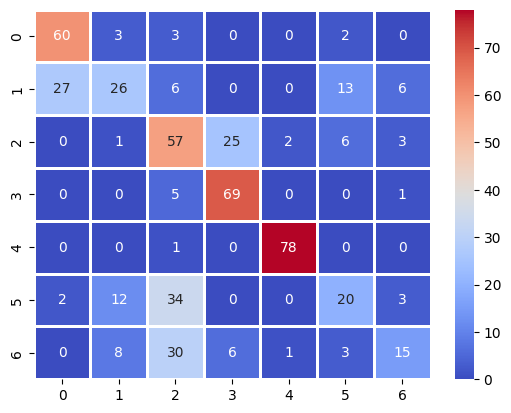

In [39]:
funcPlotMatriz(y_test, classificar)

## Entendendo o Resultado do Modelo

### Distribui√ß√£o dos Dados

C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_32052\382664771.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True, color="b", ax=axs[0, 0])
C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_32052\382664771.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Height'], shade=True, color="b", ax=axs[0, 1])
C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_32052\382664771.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Weight'], shade=True, color="b", ax=axs[0, 2])
C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_32052\382664771.py:7: UserWarning: 

`distplot

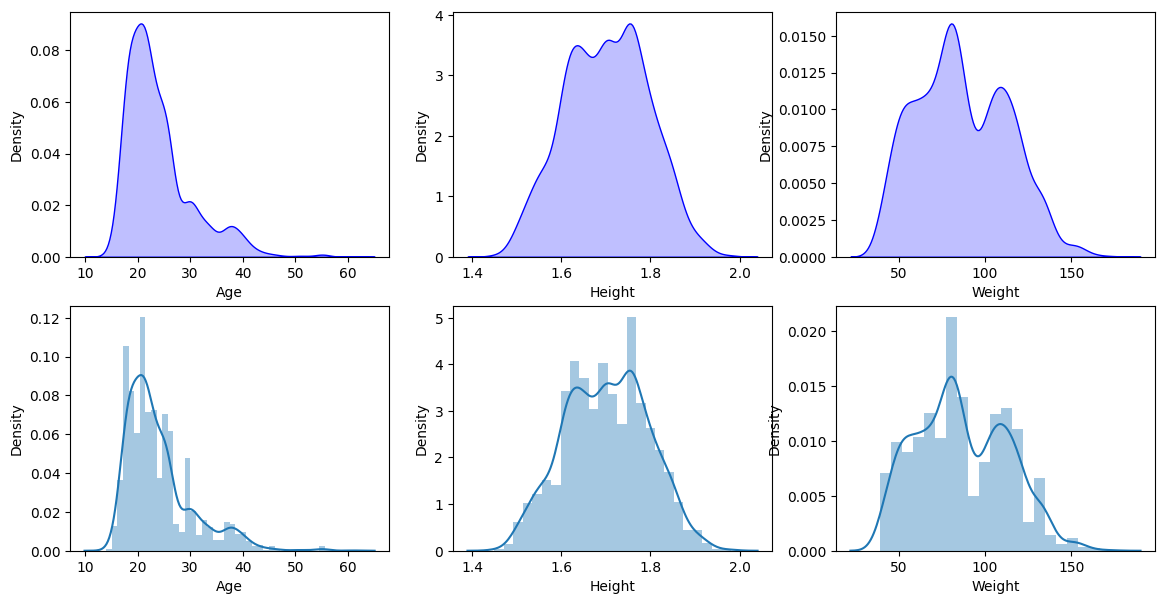

In [40]:
fig, axs = plt.subplots(2, 3, figsize=(14, 7))

sns.kdeplot(df['Age'], shade=True, color="b", ax=axs[0, 0])
sns.kdeplot(df['Height'], shade=True, color="b", ax=axs[0, 1])
sns.kdeplot(df['Weight'], shade=True, color="b", ax=axs[0, 2])

sns.distplot( a=df["Age"], hist=True, kde=True, rug=False, ax=axs[1, 0])
sns.distplot( a=df["Height"], hist=True, kde=True, rug=False, ax=axs[1, 1])
sns.distplot( a=df["Weight"], hist=True, kde=True, rug=False, ax=axs[1, 2])

plt.show()

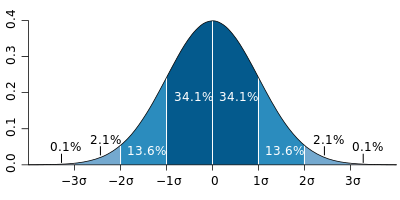

O modelo "GaussianNB" assume que os dados quantitativos seguem uma distribui√ß√£o normal (gaussiana). Ao analisarmos os gr√°ficos plotados, fica claro que as colunas "Age" e "Weight" est√£o bem diferentes da distribui√ß√£o normal; por outro lado, a coluna "Height" se aproxima muito da distribui√ß√£o normal.

Al√©m disso, o dataset possui em grande maioria colunas qualitativas, que n√£o se adequam bem ao modelo GaussianNB. Quando codificamos estas colunas com OrdinalEncoder, o modelo tratar√° elas como se fossem valores quantitativos, aplicando a suposi√ß√£o de distribui√ß√£o normal. Assim, levando a irregularidades no modelo, j√° que vari√°veis categ√≥ricas n√£o seguem distribui√ß√µes gaussianas (na maioria dos casos).

Com as plotagens a baixo, se comprova a disregularidade na distribui√ß√£o das colunas qualitativas transformadas em quantitativas. Mostrando sua deistribui√ß√£o e como seria a distribui√ß√£o normal.

C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_32052\3760981640.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_encoded[col], shade=True, color="b", ax=axs[i])
C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_32052\3760981640.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_encoded[col], shade=True, color="b", ax=axs[i])
C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_32052\3760981640.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_encoded[col], shade=True, color="b", ax=axs[i])
C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_32052\3760981640.py:6: FutureWarning: 



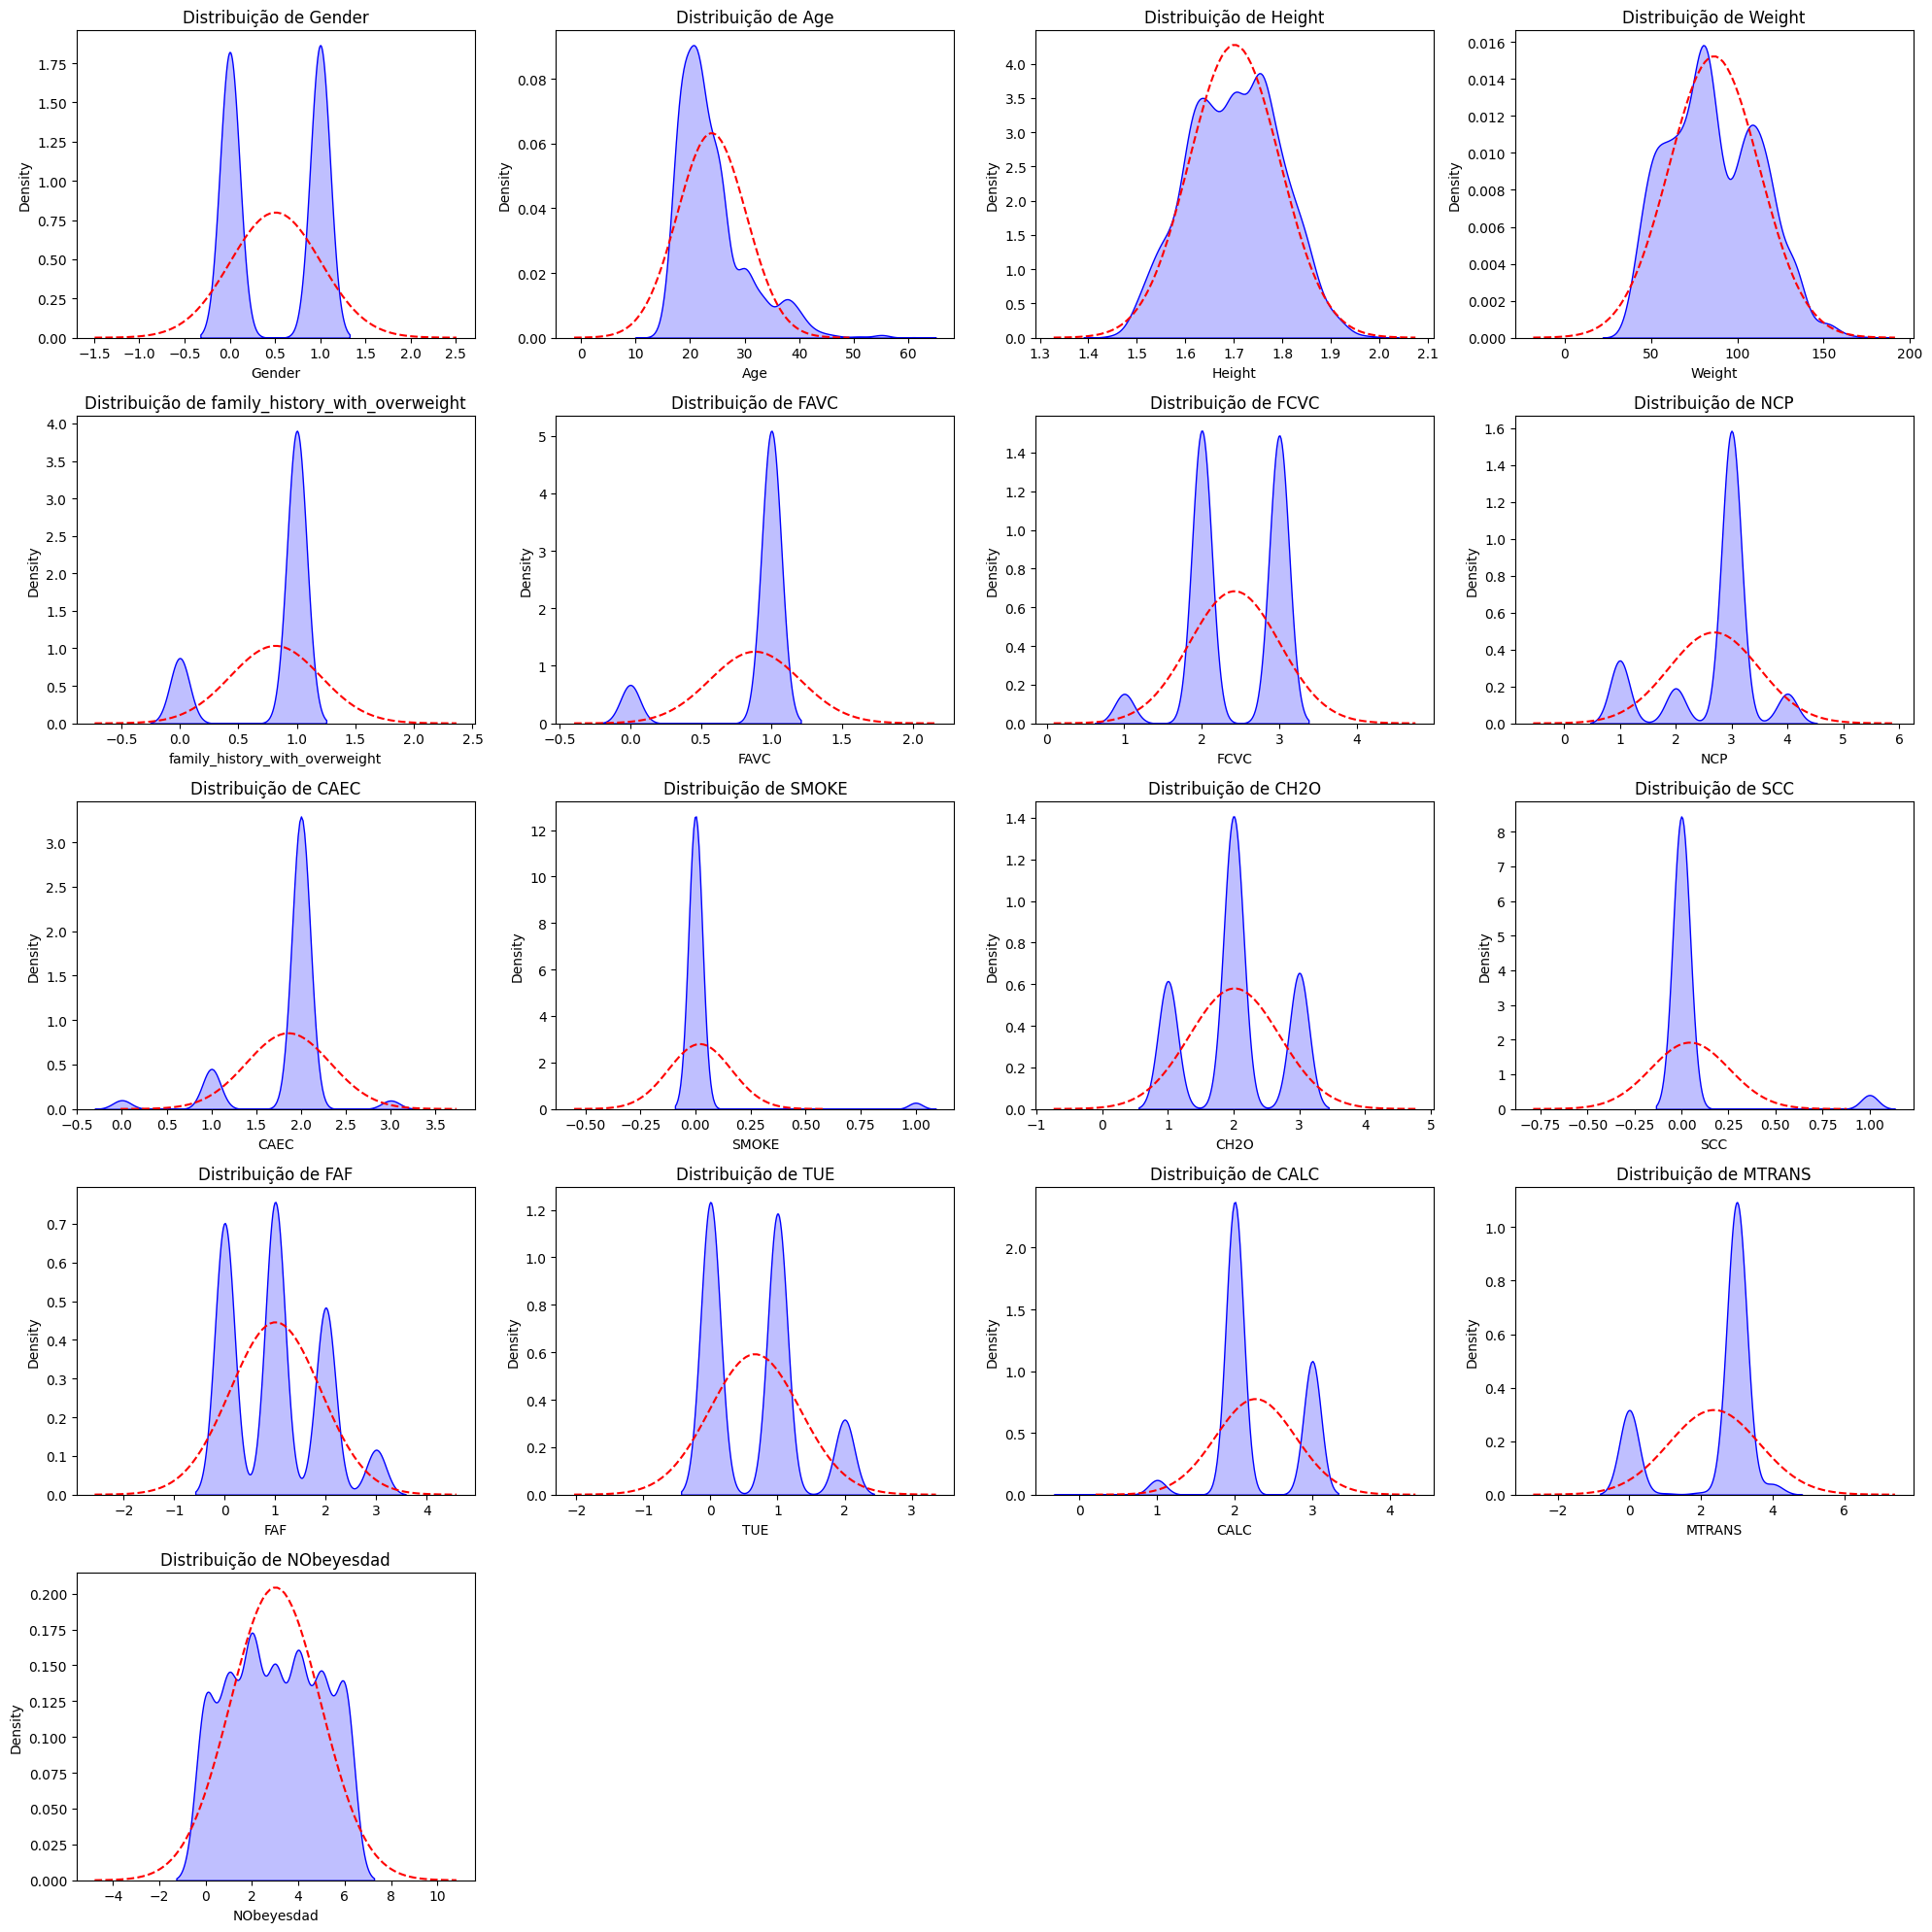

In [41]:
fig, axs = plt.subplots(int(np.ceil(len(df_encoded.columns) / 4)), 4, figsize=(20, 20))
axs = axs.flatten()  # Aplanar a matriz de eixos para f√°cil indexa√ß√£o

for i, col in enumerate(df_encoded.columns):
    # Plotar a distribui√ß√£o da coluna com KDE
    sns.kdeplot(df_encoded[col], shade=True, color="b", ax=axs[i])
    
    mean = df_encoded[col].mean()
    std = df_encoded[col].std()
    
    x = np.linspace(mean - 4*std, mean + 4*std, 100)
    y = norm.pdf(x, mean, std)
    
    axs[i].plot(x, y, color='r', linestyle='--')
    
    axs[i].set_title(f'Distribui√ß√£o de {col}')

for j in range(len(df_encoded.columns), len(axs)):
    fig.delaxes(axs[j])

# Ajustar layout para evitar sobreposi√ß√£o
plt.tight_layout()
plt.show()

### Correla√ß√£o das Vari√°veis

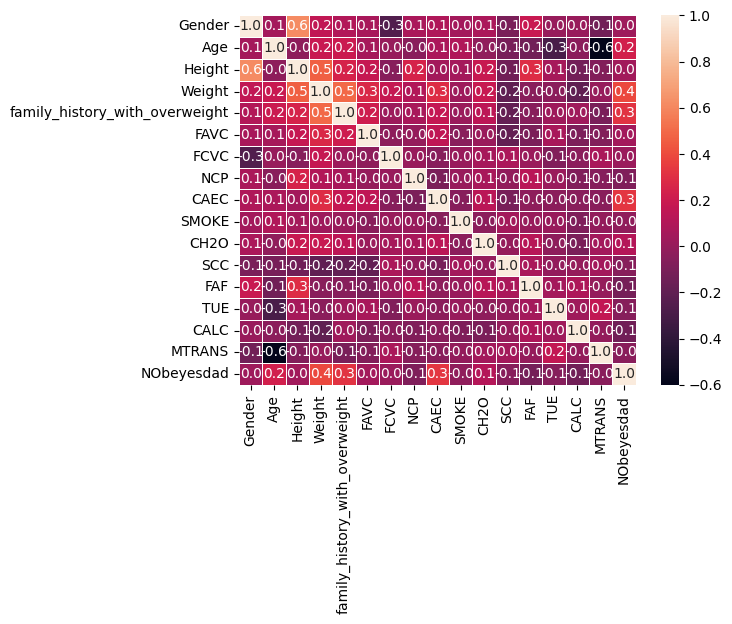

In [42]:
correlation = df_encoded[df_encoded.columns.to_list()].corr()

sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plt.show()

Plotando a matriz de correla√ß√£o, √© poss√≠vel dizer que as vari√°veis s√£o independentes, por conterem pouqu√≠ssima correla√ß√£o entre si (n√∫meros muito pr√≥ximos a 0), ponto positivo para o modelo, por conta do algoritmo Naive Bayes, que √© um classificador probabil√≠stico que assume que as caracter√≠sticas (features) s√£o independentes entre si, da√≠ o termo ‚Äúnaive‚Äù (ing√™nuo). Essa √© uma simplifica√ß√£o feita para facilitar o c√°lculo das probabilidades condicionais necess√°rias para classifica√ß√£o.

### Maldi√ß√£o da Dimensionalidade

In [43]:
len(df_x.columns)

16

Outro fator que pode estar prejudicando o desempenho do modelo √© a alta quantidade de dimens√µes (colunas). Esse problema √© denominado "Maldi√ß√£o da Dimensionalidade", termo introduzido pelo matem√°tico R. Bellman, que se refere ao problema causado pelo aumento exponencial no volume associado √† adi√ß√£o de dimens√µes extras a um espa√ßo matem√°tico.

Por exemplo:

Se dividirmos uma regi√£o do espa√ßo em c√©lulas regulares, o n√∫mero de c√©lulas cresce exponencialmente com a dimens√£o do espa√ßo. Vamos denominar a dimens√£o como 
ùê∑ e as c√©lulas como ùëÅ.


Se tivermos uma dimens√£o ùê∑1, com um n√∫mero qualquer de c√©lulas como ùëÅ:


Ao aumentarmos uma dimens√£o, passando a ter ùê∑2, precisaremos ter o n√∫mero de c√©lulas como ùëÅ^2.


Assim como ùê∑3 passaria a ter ùëÅ^3, e assim por diante.


O que quero dizer √© que, para um n√∫mero qualquer de dimens√µes, √© necess√°rio ter a quantidade certa de amostras de dados. Isso nos leva a pensar que essa quantidade de amostras pode ser insuficiente ou excedente para essa quantidade de dimens√µes.

Algumas imagens que ilustram a explica√ß√£o:

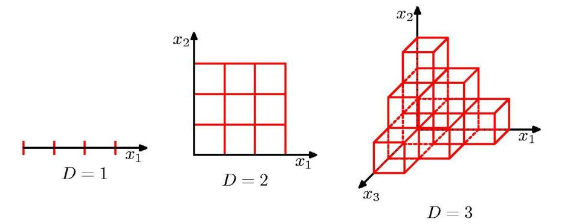

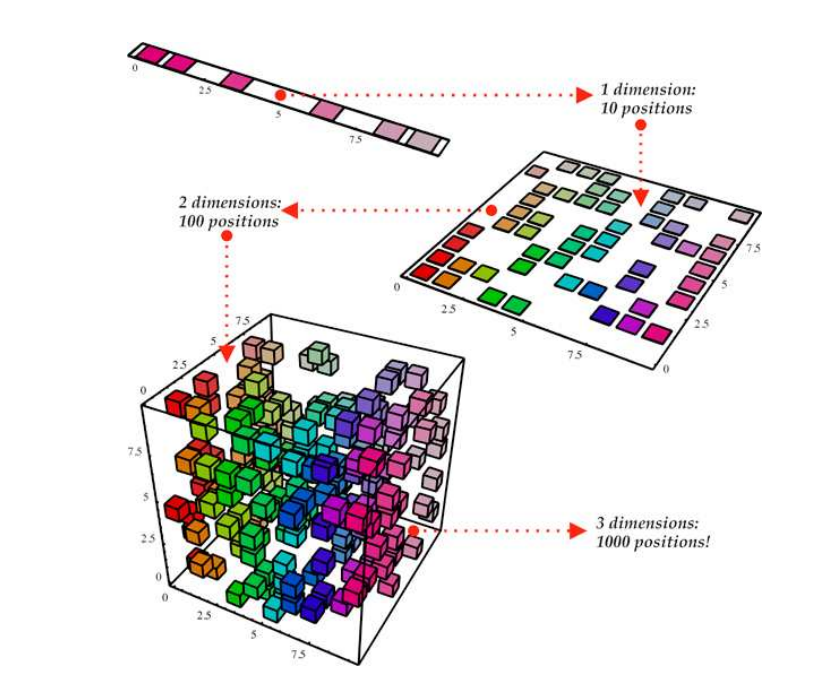

### Distribui√ß√£o das Classes Resposta

Iremos verificar a distribui√ß√£o das classes, por conta do GaussianNB se comportar mal com classes desbalanceadas. Ele tende a priorizar as classes majorit√°rias e pode ter dificuldade em prever corretamente as classes minorit√°rias.

In [44]:
display(df_y_encoded.value_counts())
display(y_train.value_counts())
display(y_test.value_counts())

NObeyesdad
2             351
4             324
3             297
5             290
6             290
1             287
0             272
dtype: int64

NObeyesdad
2             257
4             245
6             227
3             222
5             219
1             209
0             204
dtype: int64

NObeyesdad
2             94
4             79
1             78
3             75
5             71
0             68
6             63
dtype: int64

As classes resposta est√£o bem balanceadas, sem mostrar grandes disparidades

## Teste do Modelo Embasado Nos Resultados Anteriores e em Obter o Melhor Desempenho Poss√≠vel do Modelo

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

### Importando e Tratando Todas as Bases Alter√°das em An√°lise Axplorat√≥ria

In [46]:
lista_df = [] # Lista para armazenar os dfs

In [47]:
lista_df.append(df)

df_capping = pd.read_excel('..\dados\df_capping.xlsx')
display(df_capping.head(2))
lista_df.append(df_capping)

df_iqr = pd.read_excel('..\dados\df_iqr.xlsx')
display(df_iqr.head(2))
lista_df.append(df_iqr)

df_log = pd.read_excel('..\dados\df_log.xlsx')
display(df_log.head(2))
lista_df.append(df_log)

df_raiz = pd.read_excel('..\dados\df_raiz.xlsx')
display(df_raiz.head(2))
lista_df.append(df_raiz)


Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no     2    3   
1  Female   21    1.52    56.0                            yes   no     3    3   

        CAEC SMOKE  CH2O  SCC  FAF  TUE       CALC                 MTRANS  \
0  Sometimes    no     2   no    0    1         no  Public_Transportation   
1  Sometimes   yes     3  yes    3    0  Sometimes  Public_Transportation   

      NObeyesdad  
0  Normal_Weight  
1  Normal_Weight

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no     2    3   
1  Female   21    1.52    56.0                            yes   no     3    3   

        CAEC SMOKE  CH2O  SCC  FAF  TUE       CALC                 MTRANS  \
0  Sometimes    no     2   no    0    1         no  Public_Transportation   
1  Sometimes   yes     3  yes    3    0  Sometimes  Public_Transportation   

      NObeyesdad  
0  Normal_Weight  
1  Normal_Weight

Gender       Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  3.091042    1.62    64.0                            yes   no     2   
1  Female  3.091042    1.52    56.0                            yes   no     3   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE       CALC  \
0    3  Sometimes    no     2   no    0    1         no   
1    3  Sometimes   yes     3  yes    3    0  Sometimes   

                  MTRANS     NObeyesdad  
0  Public_Transportation  Normal_Weight  
1  Public_Transportation  Normal_Weight

Gender       Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  4.582576    1.62    64.0                            yes   no     2   
1  Female  4.582576    1.52    56.0                            yes   no     3   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE       CALC  \
0    3  Sometimes    no     2   no    0    1         no   
1    3  Sometimes   yes     3  yes    3    0  Sometimes   

                  MTRANS     NObeyesdad  
0  Public_Transportation  Normal_Weight  
1  Public_Transportation  Normal_Weight

In [48]:
df_capping.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [49]:
for k,v in enumerate(lista_df):
    ordem_colunas = lista_df[k].columns
    lista_df[k] = preprocessador.fit_transform(v)
    lista_df[k] = pd.DataFrame(lista_df[k], columns=preprocessador.get_feature_names_out())
    lista_df[k] = lista_df[k][ordem_colunas]


### PIPELINE

In [50]:
classificador_bayes.get_params()

{'priors': None, 'var_smoothing': 1e-09}

Esta pipeline ser√° utilizada para, organizar os passos de transforma√ß√£o de dados e para tentar aplicar o melhor modelo possivel nas condi√ß√µes do nosso caso. Al√©m disso, ela tamb√©m √© muito util para replicar o processo em outros modelos. 

### Explica√ß√£o da Pipeline

- "df_metricas" -> DataFrame que armazena o nome do modelo, o DataFrame utilizado, as m√©tricas de teste e a melhor combina√ß√£o de hiperpar√¢metros encontrada.
  
- "pipe" -> Vari√°vel que armazena todos os processos que comp√µem a pipeline.
    - `StandardScaler` -> Centraliza os dados em torno de zero, subtraindo a m√©dia de cada coluna e dividindo pelo desvio padr√£o, normalizando a dispers√£o dos dados.
    - `SelectKBest` -> Seleciona as features mais importantes da base de dados, auxiliando na redu√ß√£o de dimensionalidade. Utilizo esse m√©todo para reduzir o n√∫mero de perguntas que ser√£o feitas ao usu√°rio, de 16 para, no m√°ximo, 10.
    - `PCA` -> Reduz a dimensionalidade ap√≥s o SelectKBest, preservando o m√°ximo de vari√¢ncia nos dados.
    - `GaussianNB` -> Modelo de machine learning utilizado ap√≥s a redu√ß√£o de dimensionalidade.

- "params_pipe" -> Lista de par√¢metros que ser√£o testados na pipeline.
    - `SelectKBest__k` e `pca__n_components` -> Definem o n√∫mero de colunas a serem mantidas na redu√ß√£o dimensional.
    - `SelectKBest__score_func` -> Fun√ß√µes de avalia√ß√£o usadas para selecionar as colunas mais relevantes.
    - `model__var_smoothing` -> Adiciona uma pequena quantidade √† vari√¢ncia de cada feature, evitando problemas num√©ricos e overfitting.

- "valores_k" -> Define o n√∫mero m√°ximo de colunas a serem selecionadas (at√© 10) pelo SelectKBest.

- GridSearchCV -> Executa a pipeline com diferentes combina√ß√µes de hiperpar√¢metros, realiza valida√ß√£o cruzada e encontra a combina√ß√£o que otimiza a acur√°cia.

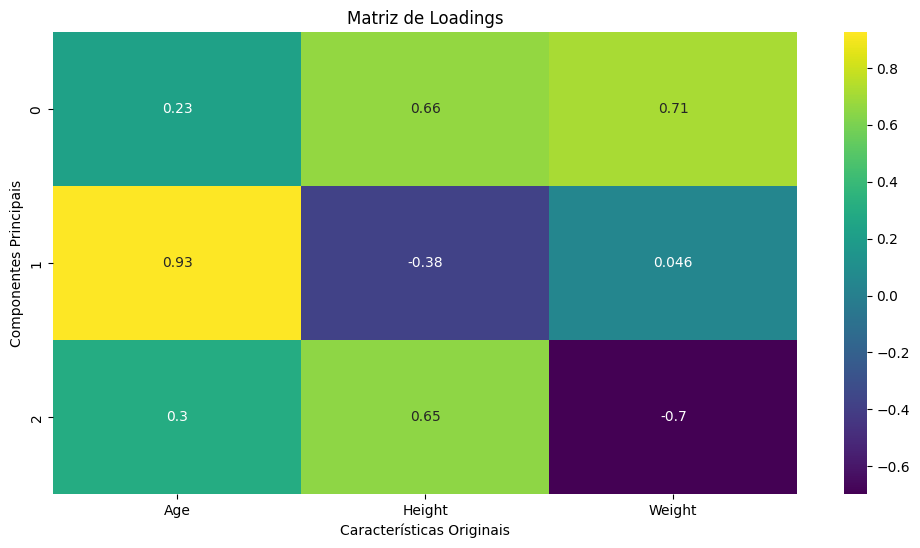

Melhores parametros:  {'SelectKBest__k': 3, 'SelectKBest__score_func': <function mutual_info_classif at 0x000002138AF785E0>, 'model__var_smoothing': 0.01519911082952933, 'pca__n_components': 3}
Melhor accuracy:  0.6582158687058259
              precision    recall  f1-score   support

         0.0       0.69      0.78      0.73        68
         1.0       0.51      0.49      0.50        78
         2.0       0.76      0.70      0.73        94
         3.0       0.71      0.80      0.75        75
         4.0       0.94      1.00      0.97        79
         5.0       0.45      0.41      0.43        71
         6.0       0.34      0.32      0.33        63

    accuracy                           0.65       528
   macro avg       0.63      0.64      0.63       528
weighted avg       0.64      0.65      0.65       528



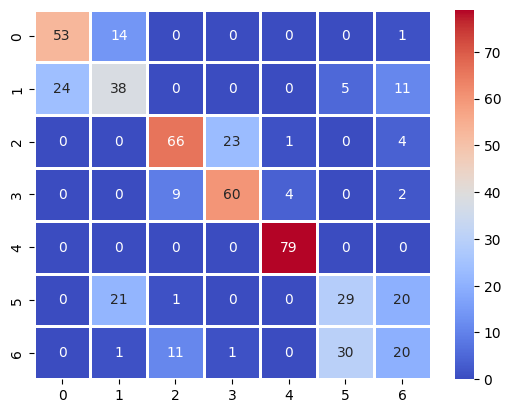

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


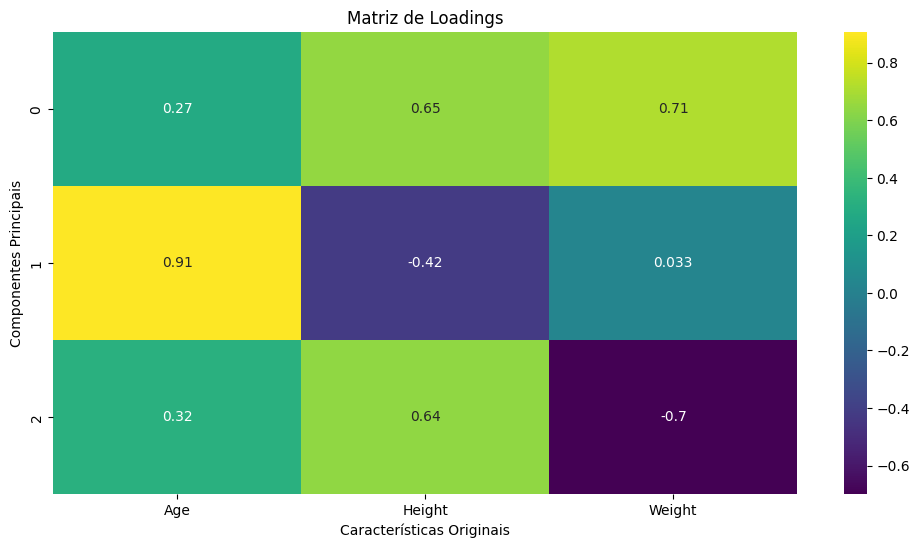

Melhores parametros:  {'SelectKBest__k': 3, 'SelectKBest__score_func': <function mutual_info_classif at 0x000002138AF785E0>, 'model__var_smoothing': 0.012328467394420659, 'pca__n_components': 3}
Melhor accuracy:  0.6658028191510601
              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74        68
         1.0       0.47      0.59      0.52        78
         2.0       0.76      0.72      0.74        94
         3.0       0.74      0.84      0.79        75
         4.0       0.93      1.00      0.96        79
         5.0       0.33      0.20      0.25        71
         6.0       0.36      0.33      0.34        63

    accuracy                           0.65       528
   macro avg       0.62      0.63      0.62       528
weighted avg       0.63      0.65      0.63       528



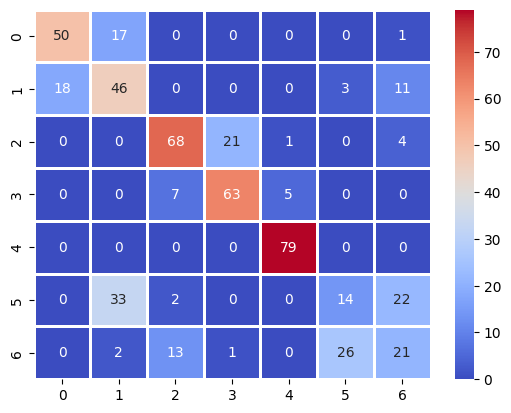

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


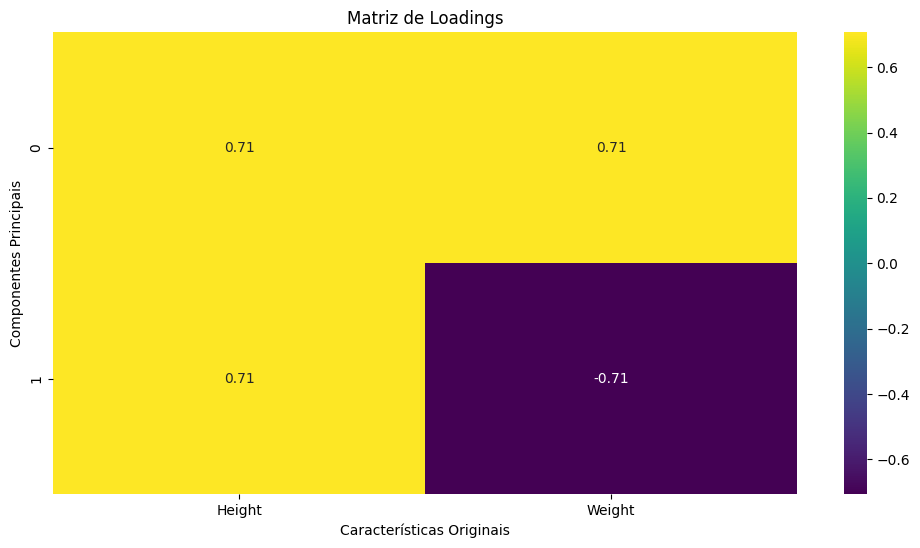

Melhores parametros:  {'SelectKBest__k': 2, 'SelectKBest__score_func': <function mutual_info_classif at 0x000002138AF785E0>, 'model__var_smoothing': 0.006579332246575682, 'pca__n_components': 2}
Melhor accuracy:  0.6883454398708636
              precision    recall  f1-score   support

         0.0       0.86      0.56      0.68        85
         1.0       0.46      0.69      0.55        70
         2.0       0.72      0.66      0.69        70
         3.0       0.64      0.81      0.72        64
         4.0       0.91      0.87      0.89        79
         5.0       0.71      0.70      0.70        66
         6.0       0.80      0.61      0.69        57

    accuracy                           0.70       491
   macro avg       0.73      0.70      0.70       491
weighted avg       0.73      0.70      0.71       491



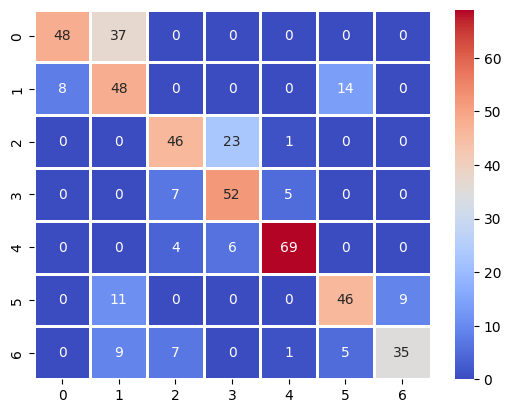

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


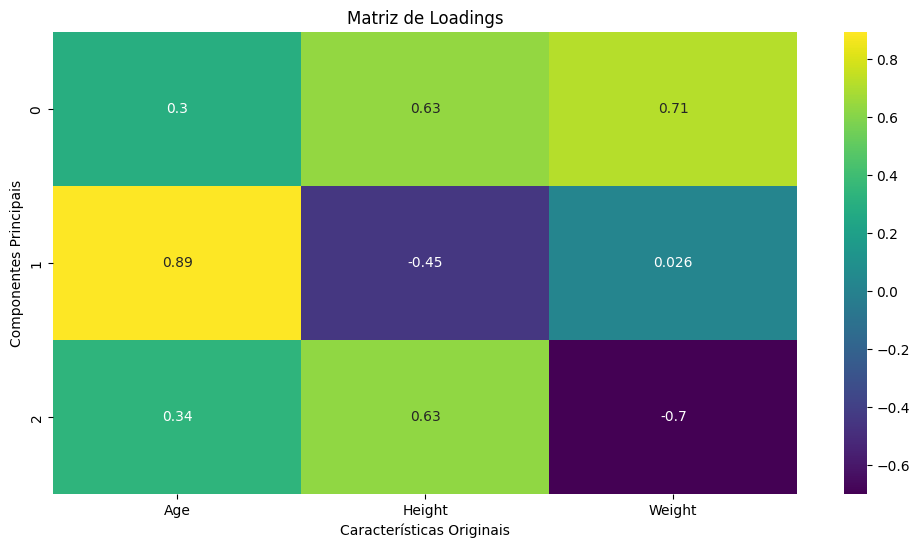

Melhores parametros:  {'SelectKBest__k': 3, 'SelectKBest__score_func': <function mutual_info_classif at 0x000002138AF785E0>, 'model__var_smoothing': 0.0004328761281083057, 'pca__n_components': 3}
Melhor accuracy:  0.6771832448189115
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        68
         1.0       0.61      0.56      0.59        78
         2.0       0.72      0.69      0.71        94
         3.0       0.75      0.84      0.79        75
         4.0       0.92      0.99      0.95        79
         5.0       0.52      0.48      0.50        71
         6.0       0.35      0.35      0.35        63

    accuracy                           0.68       528
   macro avg       0.66      0.67      0.66       528
weighted avg       0.67      0.68      0.67       528



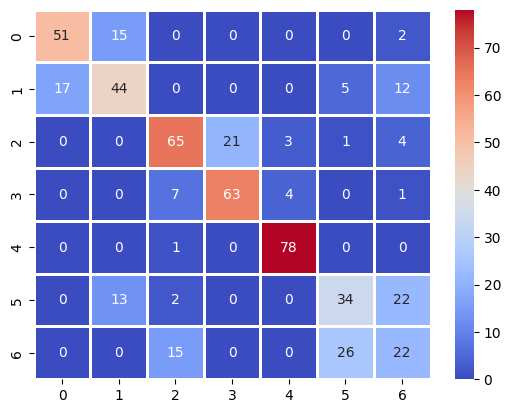

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


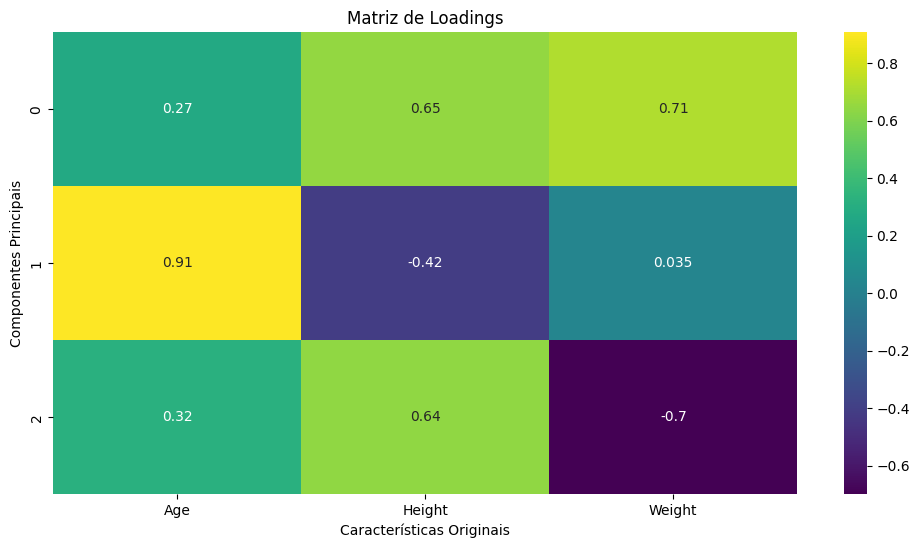

Melhores parametros:  {'SelectKBest__k': 3, 'SelectKBest__score_func': <function mutual_info_classif at 0x000002138AF785E0>, 'model__var_smoothing': 0.006579332246575682, 'pca__n_components': 3}
Melhor accuracy:  0.6670726350676836
              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76        68
         1.0       0.58      0.55      0.57        78
         2.0       0.73      0.71      0.72        94
         3.0       0.73      0.81      0.77        75
         4.0       0.93      1.00      0.96        79
         5.0       0.49      0.42      0.45        71
         6.0       0.34      0.33      0.34        63

    accuracy                           0.67       528
   macro avg       0.65      0.66      0.65       528
weighted avg       0.66      0.67      0.66       528



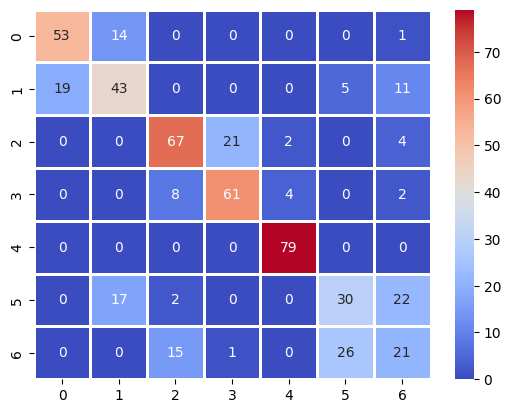

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Modelo                                                 DF  \
0  GaussianNB        Gender   Age    Height      Weight  fami...   
1  GaussianNB        Gender   Age    Height      Weight  fami...   
2  GaussianNB        Gender   Age    Height      Weight  fami...   
3  GaussianNB        Gender       Age    Height      Weight  ...   
4  GaussianNB        Gender       Age    Height      Weight  ...   

  Quant_columns                                   Hyper_Parametros  Acuracia  \
0             3  {'SelectKBest__k': 3, 'SelectKBest__score_func...  0.653409   
1             3  {'SelectKBest__k': 3, 'SelectKBest__score_func...  0.645833   
2             2  {'SelectKBest__k': 2, 'SelectKBest__score_func...  0.700611   
3             3  {'SelectKBest__k': 3, 'SelectKBest__score_func...  0.676136   
4             3  {'SelectKBest__k': 3, 'SelectKBest__score_func...  0.670455   

   Recall_Media  Precision_Media  F1_Score_Media  
0          0.64             0.63            0.63  
1          0.63             0.62            0.62  
2          0.70             0.73            0.70  
3          0.67             0.66            0.66  
4          0.66             0.65            0.65

In [51]:
df_metricas = pd.DataFrame(columns=['Modelo','DF','Quant_columns','Hyper_Parametros','Acuracia','Recall_Media', 'Precision_Media', 'F1_Score_Media'])

for data_frame in lista_df:
    X_train, X_test, y_train, y_test = train_test_split(data_frame[data_frame.columns[:-1]], data_frame['NObeyesdad'], test_size=0.25,random_state=42,shuffle=True)
    
    pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('SelectKBest', SelectKBest()),
                ('pca', PCA()),
                ('model', GaussianNB())
                ])
    

    params_pipe = []
    valores_k = range(1, 11)

    for k in valores_k:
        for n in range(1, k + 1):
    
            params_pipe.append({
                'SelectKBest__k': [k],
                'pca__n_components': [n],
                'SelectKBest__score_func':[f_classif,f_oneway,mutual_info_classif],
                'model__var_smoothing': np.logspace(0,-9, num=100),
            })

    grid_search = GridSearchCV(estimator = pipe,param_grid=params_pipe,n_jobs=-1,scoring='accuracy')

    grid_search.fit(X_train,y_train)


    pca =grid_search.best_estimator_.named_steps['pca']
    kBest = grid_search.best_estimator_.named_steps['SelectKBest']
    
    components_df = pd.DataFrame(pca.components_, columns=data_frame.columns[kBest.get_support(indices=True).tolist()])

    # Plotagem
    plt.figure(figsize=(12, 6))
    sns.heatmap(components_df, cmap='viridis', annot=True)
    plt.xlabel('Caracter√≠sticas Originais')
    plt.ylabel('Componentes Principais')
    plt.title('Matriz de Loadings')
    plt.show()

    # Analisando os resultados 
    melhor = grid_search.best_params_
    classificador_grafico = grid_search.best_estimator_ 
    print("Melhores parametros: ",melhor)
    print("Melhor accuracy: ",grid_search.best_score_)
    previsao = classificador_grafico.predict(X_test)
    metricas = classification_report(y_test,previsao)
    print(metricas)
    funcPlotMatriz(y_test, previsao)
    df_metricas = funcMetricas(df_metricas,'GaussianNB',data_frame,len(pca.components_),melhor,y_test,previsao)

display(df_metricas)        

### Algumas Conclus√µes

√Ä primeira vista, a mudan√ßa pode parecer pequena, por√©m, tive que for√ßar o modelo a trabalhar com no m√°ximo 10 colunas de caracter√≠sticas, uma redu√ß√£o significativa para um modelo que possu√≠a 16 colunas no treinamento. Mesmo assim, ele conseguiu manter resultados semelhantes no teste simples e, em alguns casos, at√© melhores.

Outras conclus√µes que podem ser tiradas s√£o que as colunas selecionadas, que tiveram o melhor desempenho na valida√ß√£o cruzada (Cross-Validation), foram:

- Age
- Height
- Weight
- family_history_with_overweight
- FAVC
- CAEC
- CH20
Por fim, as m√©tricas obtidas pelo modelo n√£o foram das melhores, e √© prov√°vel que este n√£o seja o melhor modelo para essa base de dados.

In [52]:
df_metricas.to_excel('..\comparacao_modelos\DataFrames\df_bayes.xlsx')
